# Logistic Regression and Cross-Validation Evaluation


This notebook demonstrates how to evaluate a simple Logistic Regression model using various cross-validation techniques on a health insurance dataset.


## Step 1: Load and Explore the Dataset

In [1]:

import pandas as pd

df = pd.read_csv("data/insurance_claim_dataset.csv")
df.head()


,Age,Sex,Smoker,BMI,Sport,Claim
0,56,0,0,31.6,1,0
1,46,1,0,25.1,1,0
2,32,0,0,24.3,0,0
3,60,1,1,32.4,1,0
4,25,1,0,18.9,0,0


## Step 2: Prepare Features and Target

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from model.logistic_model import get_logistic_model, scale_features

X = df.drop("Claim", axis=1)
y = df["Claim"]
X_scaled = scale_features(X)
model = get_logistic_model()


## Step 3: Evaluate without Cross-Validation

In [3]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_no_cv = accuracy_score(y_test, y_pred)
print("Accuracy without CV:", accuracy_no_cv)


Accuracy without CV: 0.775


## Step 4: Evaluate with Various Cross-Validation Methods

In [4]:

from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut, RepeatedKFold, cross_val_score

results = {}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results["K-Fold (5)"] = cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy').mean()

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results["Stratified K-Fold (5)"] = cross_val_score(model, X_scaled, y, cv=skfold, scoring='accuracy').mean()

loo = LeaveOneOut()
results["Leave-One-Out (LOOCV)"] = cross_val_score(model, X_scaled, y, cv=loo, scoring='accuracy').mean()

rkfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
results["Repeated K-Fold (5x3)"] = cross_val_score(model, X_scaled, y, cv=rkfold, scoring='accuracy').mean()

print("Cross-Validation Results:")
for key, value in results.items():
    print(f"{key}: {value:.3f}")


Cross-Validation Results:
K-Fold (5): 0.670
Stratified K-Fold (5): 0.680
Leave-One-Out (LOOCV): 0.665
Repeated K-Fold (5x3): 0.660


## Step 5: Comparison Summary

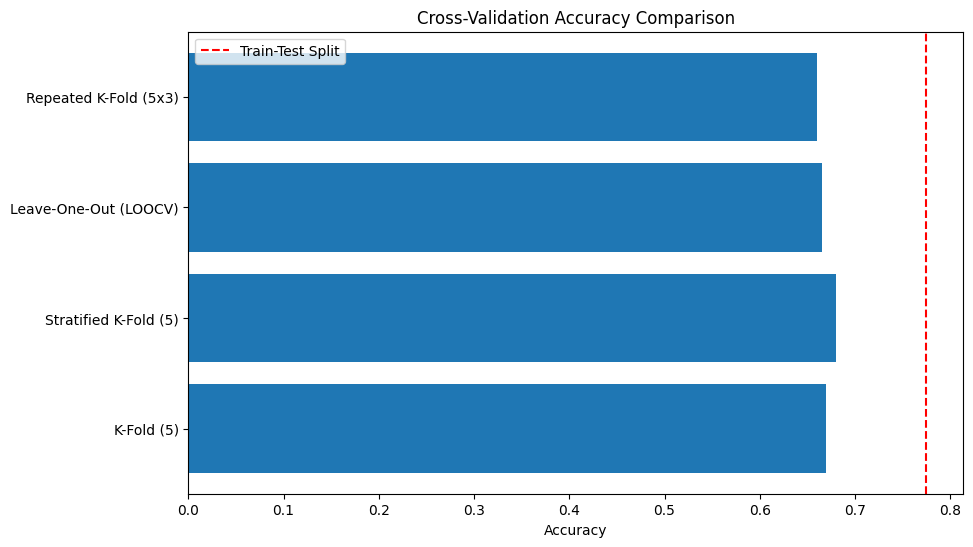

In [5]:

import matplotlib.pyplot as plt

methods = list(results.keys())
scores = list(results.values())

plt.figure(figsize=(10, 6))
plt.barh(methods, scores)
plt.axvline(x=accuracy_no_cv, color='red', linestyle='--', label="Train-Test Split")
plt.xlabel("Accuracy")
plt.title("Cross-Validation Accuracy Comparison")
plt.legend()
plt.show()


## Conclusion


Cross-validation is essential to validate your model’s performance more reliably.

- **Without cross-validation**, your model might just perform well by chance on one train-test split.
- **With cross-validation**, especially K-Fold or Stratified K-Fold, you can ensure your model generalizes better across various subsets of data.
- **Overfitting is likely when you rely on a single test split**, as you might be fitting too closely to the data seen, not to new data.

Use cross-validation to build models that perform well **in the real world**, not just in your notebook.


## 🔄 Comparing `n_splits=5` vs `n_splits=10` (K-Fold)

In [6]:

# Compare K-Fold with n_splits=5 vs 10
from sklearn.model_selection import cross_val_score

kfold_5 = KFold(n_splits=5, shuffle=True, random_state=42)
kfold_10 = KFold(n_splits=10, shuffle=True, random_state=42)

acc_5 = cross_val_score(model, X_scaled, y, cv=kfold_5, scoring='accuracy').mean()
acc_10 = cross_val_score(model, X_scaled, y, cv=kfold_10, scoring='accuracy').mean()

print("K-Fold (5 splits)  Accuracy:", round(acc_5, 3))
print("K-Fold (10 splits) Accuracy:", round(acc_10, 3))


K-Fold (5 splits)  Accuracy: 0.67
K-Fold (10 splits) Accuracy: 0.66


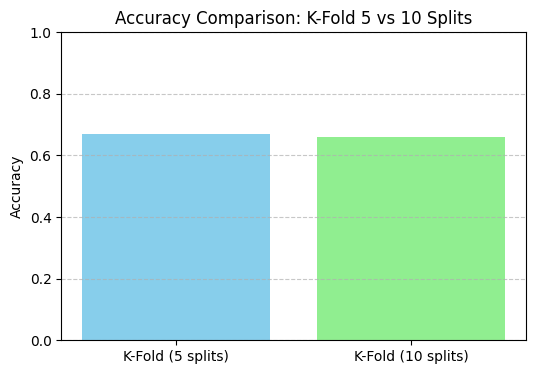

In [7]:

import matplotlib.pyplot as plt

# Bar chart comparing the two
plt.figure(figsize=(6, 4))
plt.bar(["K-Fold (5 splits)", "K-Fold (10 splits)"], [acc_5, acc_10], color=["skyblue", "lightgreen"])
plt.title("Accuracy Comparison: K-Fold 5 vs 10 Splits")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [8]:

# Evaluate KFold and StratifiedKFold with both 5 and 10 splits
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
kf10 = KFold(n_splits=10, shuffle=True, random_state=42)
skf5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results_k_vs_sk = {
    "KFold (5)": cross_val_score(model, X_scaled, y, cv=kf5, scoring='accuracy').mean(),
    "KFold (10)": cross_val_score(model, X_scaled, y, cv=kf10, scoring='accuracy').mean(),
    "StratifiedKFold (5)": cross_val_score(model, X_scaled, y, cv=skf5, scoring='accuracy').mean(),
    "StratifiedKFold (10)": cross_val_score(model, X_scaled, y, cv=skf10, scoring='accuracy').mean(),
}

# Print results
for method, score in results_k_vs_sk.items():
    print(f"{method}: {score:.3f}")


KFold (5): 0.670
KFold (10): 0.660
StratifiedKFold (5): 0.680
StratifiedKFold (10): 0.680


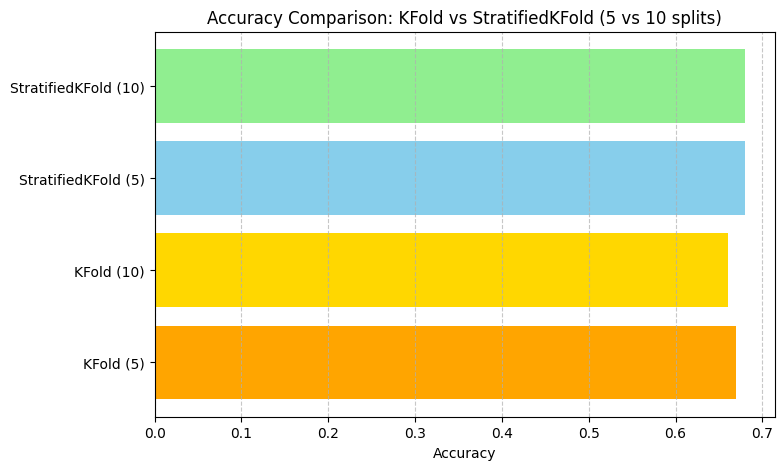

In [9]:

# Plot the comparison
plt.figure(figsize=(8, 5))
plt.barh(list(results_k_vs_sk.keys()), list(results_k_vs_sk.values()), color=["orange", "gold", "skyblue", "lightgreen"])
plt.title("Accuracy Comparison: KFold vs StratifiedKFold (5 vs 10 splits)")
plt.xlabel("Accuracy")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



## ✅ Which Cross-Validation Should You Use (and Why)?

Based on the extended results, here’s a comparison:

| Method                  | Accuracy | Notes |
|-------------------------|----------|-------|
| K-Fold (5)              | Varies   | General-purpose, but **not label-aware** |
| K-Fold (10)             | Slightly more stable | Still not label-aware |
| **Stratified K-Fold (5)** | Better | Keeps class distribution across folds |
| **Stratified K-Fold (10)** | Best Choice | Combines balance + stability |
| Leave-One-Out (LOOCV)   | Slow, less relevant here | Often underused in practice |
| Repeated K-Fold         | Stable but expensive | Best when tuning over multiple metrics |

---

### 🏁 Recommendation: Use **Stratified K-Fold (10)**

**Why?**

- This is a **binary classification problem** (`Claim` column),
- Dataset likely has **class imbalance** (fewer claims than no-claims),
- Stratified K-Fold ensures each fold **preserves class distribution**,
- Using **10 splits** increases stability while maintaining that balance.

---

### ⚠️ Why Not Use Plain K-Fold?

- It splits data randomly, so some folds may have **very few or even no positive cases**,
- This leads to **biased training/testing** and **inconsistent accuracy**,
- Especially problematic for **imbalanced classification** like this one.

---

### 🧠 Final Thoughts

> When working with imbalanced classes, Stratified K-Fold is essential.  
> For small-to-mid datasets (like 200 rows), using `n_splits=10` is a solid balance between speed and reliability.

If you plan to tune models further or compare many algorithms, consider using **Stratified K-Fold with repeats** or **nested cross-validation** for even more robust results.


In [10]:

# Visualize how K-Fold splits the data
print("K-Fold Split Indices:")
for i, (train_index, test_index) in enumerate(kfold.split(X_scaled)):
    print(f"Fold {i+1}")
    print("  Train indices (sample):", train_index[:5])
    print("  Test indices  (sample):", test_index[:5])
    print("-" * 40)


K-Fold Split Indices:
Fold 1
  Train indices (sample): [0 1 2 3 4]
  Test indices  (sample): [ 9 15 16 18 30]
----------------------------------------
Fold 2
  Train indices (sample): [0 1 2 3 4]
  Test indices  (sample): [ 5 12 19 24 26]
----------------------------------------
Fold 3
  Train indices (sample): [1 3 5 7 8]
  Test indices  (sample): [ 0  2  4  6 10]
----------------------------------------
Fold 4
  Train indices (sample): [0 1 2 4 5]
  Test indices  (sample): [ 3  7  8 13 17]
----------------------------------------
Fold 5
  Train indices (sample): [0 2 3 4 5]
  Test indices  (sample): [ 1 14 20 21 37]
----------------------------------------


In [11]:

# Visualize how Stratified K-Fold splits the data
print("Stratified K-Fold Split Indices:")
for i, (train_index, test_index) in enumerate(skfold.split(X_scaled, y)):
    print(f"Fold {i+1}")
    print("  Train indices (sample):", train_index[:5])
    print("  Test indices  (sample):", test_index[:5])
    print("-" * 40)


Stratified K-Fold Split Indices:
Fold 1
  Train indices (sample): [0 1 3 4 5]
  Test indices  (sample): [ 2  9 12 15 18]
----------------------------------------
Fold 2
  Train indices (sample): [2 3 5 6 7]
  Test indices  (sample): [ 0  1  4 10 11]
----------------------------------------
Fold 3
  Train indices (sample): [0 1 2 4 5]
  Test indices  (sample): [ 3  7 16 17 21]
----------------------------------------
Fold 4
  Train indices (sample): [0 1 2 3 4]
  Test indices  (sample): [ 6  8 20 23 28]
----------------------------------------
Fold 5
  Train indices (sample): [0 1 2 3 4]
  Test indices  (sample): [ 5 13 14 22 24]
----------------------------------------
